<a href="https://colab.research.google.com/github/khykelly-cloud/mul/blob/main/%EB%AC%BC%EB%A5%98_%EC%A7%80%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/khykelly-cloud/mul.git
%cd mul
!ls

Cloning into 'mul'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 1.04 MiB | 19.44 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/mul
 Customer.csv		 '서울형 물류설비(p-median+vrp설계).ipynb'   Truck.csv
 DistributionCenter.csv   README.md
 물류.ipynb		  Savings_GA.ipynb


In [2]:
import pandas as pd

# 고객 정보 불러오기
customers = pd.read_csv("Customer.csv")

# 센터 정보 불러오기
centers = pd.read_csv("DistributionCenter.csv")

customers.head(), centers.head()


(    X   Y  DEMAND
 0  37  52       7
 1   9  49      30
 2   2  64      16
 3   0  26       9
 4   0  30      21,
     X   Y  CAPACITY  COST
 0  30  46     10000    40
 1  37  39     10000    40
 2  23  43     10000    40
 3  56  38     10000    40
 4  42  43     10000    40)

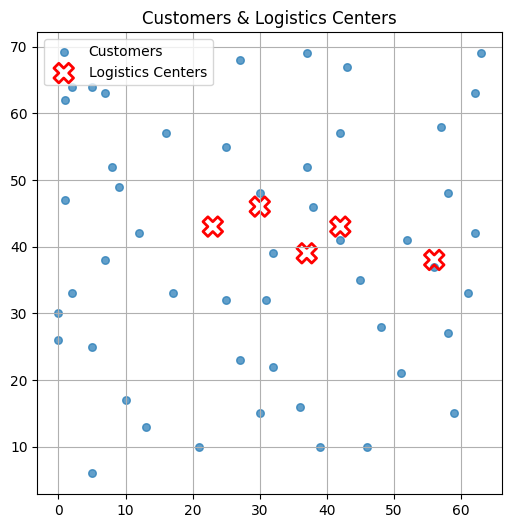

In [17]:
import matplotlib.pyplot as plt

customers_df = pd.read_csv("Customer.csv")
centers_df   = pd.read_csv("DistributionCenter.csv")

plt.figure(figsize=(6,6))

plt.scatter(customers_df["X"], customers_df["Y"],
            s=30, alpha=0.7, label="Customers")

plt.scatter(centers_df["X"], centers_df["Y"],
            marker="X", s=200, linewidths=2,
            edgecolors="red", facecolors="none",
            label="Logistics Centers")

plt.legend()
plt.grid(True)
plt.title("Customers & Logistics Centers")
plt.show()


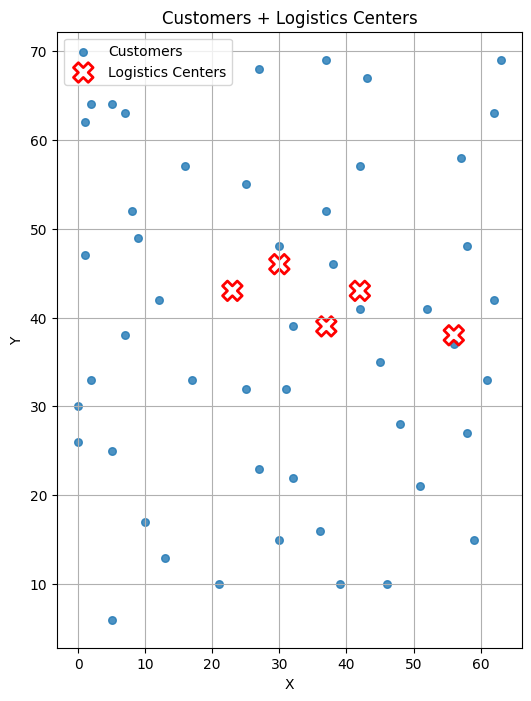

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,8))

# 고객 위치
plt.scatter(customers["X"], customers["Y"],
            s=30, alpha=0.8, label="Customers")

# 센터 위치
plt.scatter(centers["X"], centers["Y"],
            marker="X", s=200, linewidths=2,
            edgecolors="red", facecolors="none",
            label="Logistics Centers")

plt.legend()
plt.title("Customers + Logistics Centers")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


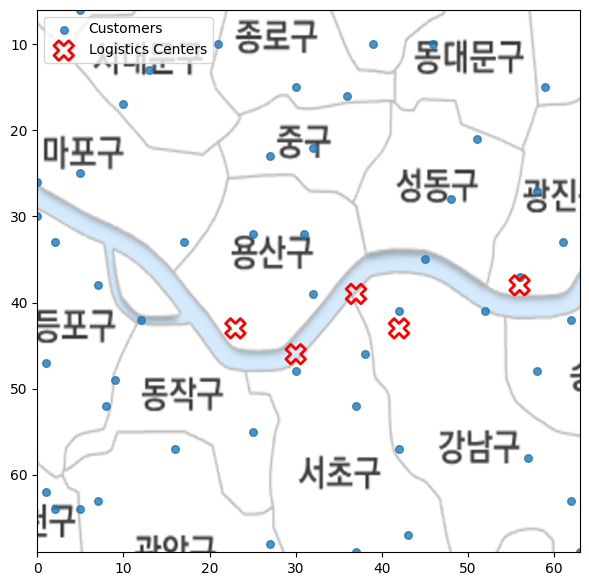

In [10]:
import matplotlib.image as mpimg
img = mpimg.imread("../seoul_map_1.png")
 # 업로드한 지도

xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

plt.figure(figsize=(7,9))
plt.imshow(
    img,
    extent=[xmin, xmax, ymax, ymin],  # ← y 범위를 거꾸로
    origin="upper"                    # ← 이미지의 윗줄이 위로 오게
)

plt.scatter(customers["X"], customers["Y"], s=30, alpha=0.8, label="Customers")
plt.scatter(centers["X"], centers["Y"],
            marker="X", s=200, edgecolors="red",
            facecolors="none", linewidths=2,
            label="Logistics Centers")

plt.legend()
plt.show()


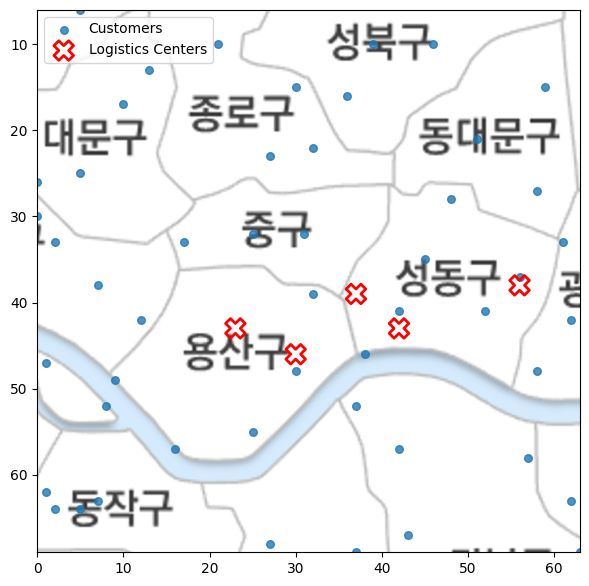

In [11]:
import matplotlib.image as mpimg
img = mpimg.imread("../seoul_map_2.png")
 # 업로드한 지도

xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

plt.figure(figsize=(7,9))
plt.imshow(
    img,
    extent=[xmin, xmax, ymax, ymin],  # ← y 범위를 거꾸로
    origin="upper"                    # ← 이미지의 윗줄이 위로 오게
)

plt.scatter(customers["X"], customers["Y"], s=30, alpha=0.8, label="Customers")
plt.scatter(centers["X"], centers["Y"],
            marker="X", s=200, edgecolors="red",
            facecolors="none", linewidths=2,
            label="Logistics Centers")

plt.legend()
plt.show()


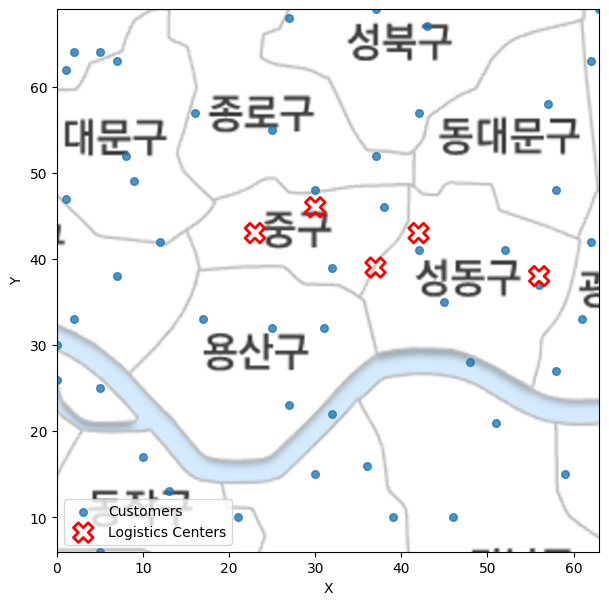

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1) 지도 이미지
img = mpimg.imread("../seoul_map_2.png")   # 네가 올린 잘라낸 지도 파일 이름

# 2) 고객 좌표 범위
xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

plt.figure(figsize=(7,9))

# 3) 지도 배경
plt.imshow(img, extent=[xmin, xmax, ymin, ymax], origin='upper')

# 4) 고객들 표시
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.8, label="Customers"
)

# 5) ⭐ 물류센터 위치 표시 (여기가 핵심)
plt.scatter(
    centers["X"], centers["Y"],
    marker="X", s=200,
    edgecolors="red", facecolors="none", linewidths=2,
    label="Logistics Centers"
)

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(False)
plt.show()


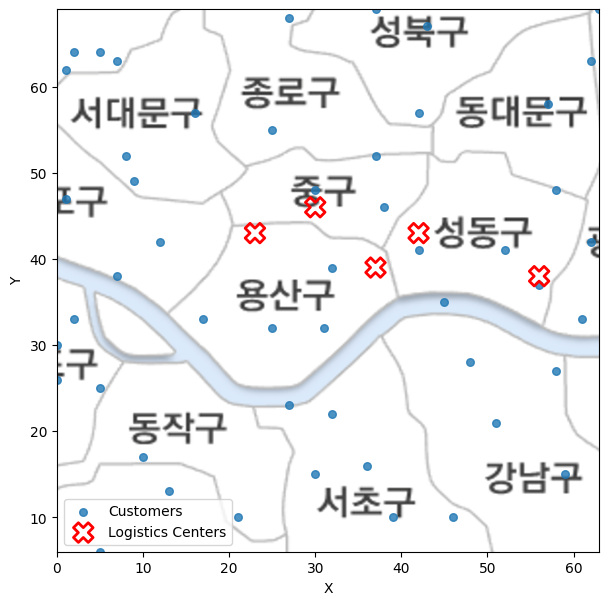

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1) 지도 이미지
img = mpimg.imread("../seoul_map_3.png")   # 네가 올린 잘라낸 지도 파일 이름

# 2) 고객 좌표 범위
xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

plt.figure(figsize=(7,9))

# 3) 지도 배경
plt.imshow(img, extent=[xmin, xmax, ymin, ymax], origin='upper')

# 4) 고객들 표시
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.8, label="Customers"
)

# 5) ⭐ 물류센터 위치 표시 (여기가 핵심)
plt.scatter(
    centers["X"], centers["Y"],
    marker="X", s=200,
    edgecolors="red", facecolors="none", linewidths=2,
    label="Logistics Centers"
)

plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(False)
plt.show()


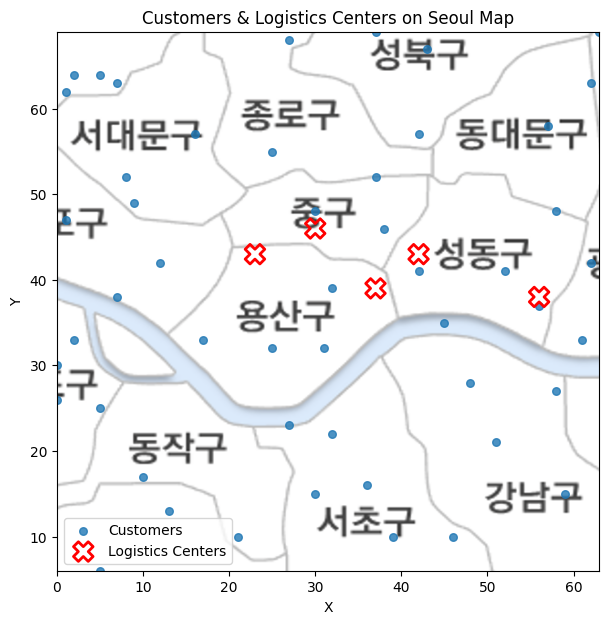

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1) 이미지 & 데이터
img = mpimg.imread("../seoul_map_3.png")

xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

plt.figure(figsize=(7,7))

# 2) 지도 배경 (도화지)
plt.imshow(
    img,
    extent=[xmin, xmax, ymin, ymax],
    origin="upper"          # 뒤집히면 'upper'로 바꿔보기
)

# 3) 고객
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.8, label="Customers"
)

# 4) 센터
plt.scatter(
    centers["X"], centers["Y"],
    marker="X", s=200,
    edgecolors="red", facecolors="none", linewidths=2,
    label="Logistics Centers"
)

# ⭐⭐ 여기 두 줄이 “처음 그림이랑 똑같이 보이게” 만드는 핵심
plt.xlim(xmin, xmax)       # 처음 scatter 그래프와 같은 X 범위
plt.ylim(ymin, ymax)       # 같은 Y 범위
plt.gca().set_aspect("auto")   # 비율도 처음 그래프처럼

plt.legend()
plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(False)
plt.show()

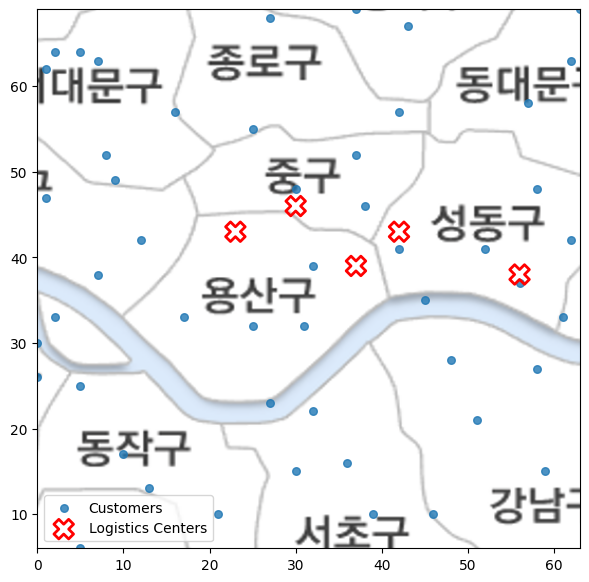

In [21]:
xmin, xmax = customers["X"].min(), customers["X"].max()
ymin, ymax = customers["Y"].min(), customers["Y"].max()

margin_x = 5
margin_y = 5

plt.figure(figsize=(7,7))

# 지도 범위를 좌우/위아래로 조금 더 넓게
plt.imshow(
    img,
    extent=[xmin - margin_x, xmax + margin_x,
            ymin - margin_y, ymax + margin_y],
    origin="upper"
)

plt.scatter(customers["X"], customers["Y"], s=30, alpha=0.8, label="Customers")
plt.scatter(centers["X"], centers["Y"],
            marker="X", s=200, edgecolors="red",
            facecolors="none", linewidths=2,
            label="Logistics Centers")

# 축은 여전히 0~65, 0~70 유지
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.gca().set_aspect("auto")

plt.legend()
plt.show()


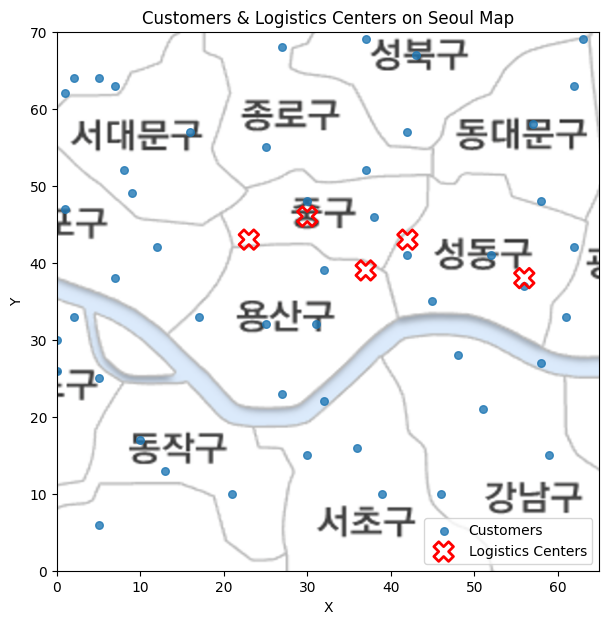

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1) 서울 지도 이미지 읽기
img = mpimg.imread("../seoul_map_3.png")   # 너가 캡처한 파일 이름

# 2) 처음 그래프에서 쓰던 축 범위를 그대로 수동으로 지정
X_MIN, X_MAX = 0, 65
Y_MIN, Y_MAX = 0, 70

plt.figure(figsize=(7,7))

# 3) 지도 이미지를 좌표 (0~65, 0~70)에 그냥 늘여 붙이기
plt.imshow(
    img,
    extent=[X_MIN, X_MAX, Y_MIN, Y_MAX],
    origin="upper"   # 뒤집혔으면 'upper'로 바꿔보기
)

# 4) 고객 점
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.8, label="Customers"
)

# 5) 물류센터 X 표시
plt.scatter(
    centers["X"], centers["Y"],
    marker="X", s=200,
    edgecolors="red", facecolors="none", linewidths=2,
    label="Logistics Centers"
)

# 6) 축 범위를 “강제로” 처음 그래프와 동일하게 고정
plt.xlim(X_MIN, X_MAX)
plt.ylim(Y_MIN, Y_MAX)
plt.gca().set_aspect("auto")   # 비율도 처음 그래프 느낌에 맞게

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(False)
plt.show()

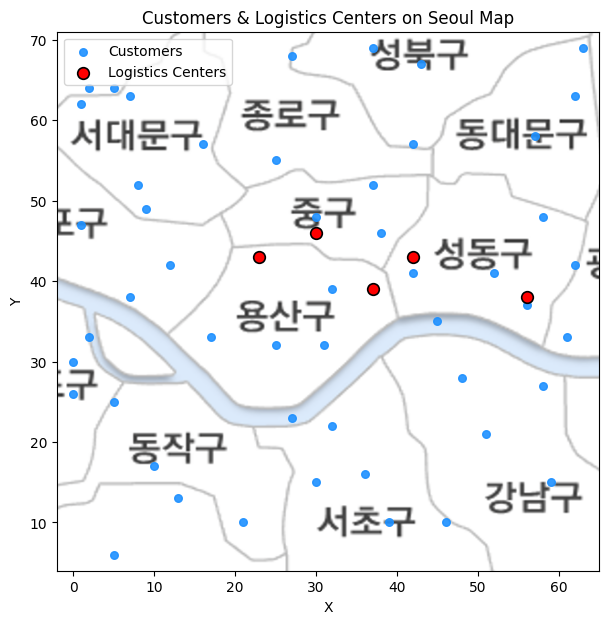

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../seoul_map_3.png")  # 지금 쓰는 서울 지도

# 1) 고객/센터 전체 범위 + 여백 조금
x_min = customers["X"].min() - 2   # 왼쪽 여백
x_max = customers["X"].max() + 2   # 오른쪽 여백
y_min = customers["Y"].min() - 2   # 아래 여백
y_max = customers["Y"].max() + 2   # 위 여백

plt.figure(figsize=(7,7))

# 2) 배경 지도 깔기 (좌표계에 맞춰 늘려서 붙이기)
plt.imshow(
    img,
    extent=[x_min, x_max, y_min, y_max],
    origin="upper"
)

# 고객 점 (파란색)
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.9,
    color="dodgerblue",
    label="Customers"
)

# 물류센터 점 (빨간색)
plt.scatter(
    centers["X"], centers["Y"],
    s=70, alpha=1.0,
    color="red",
    edgecolors="black",   # 테두리 넣으면 더 눈에 띔
    linewidths=1.2,
    label="Logistics Centers"
)


# 5) 축 범위 고정 (배경이랑 완전히 일치)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect("auto")

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(False)
plt.show()


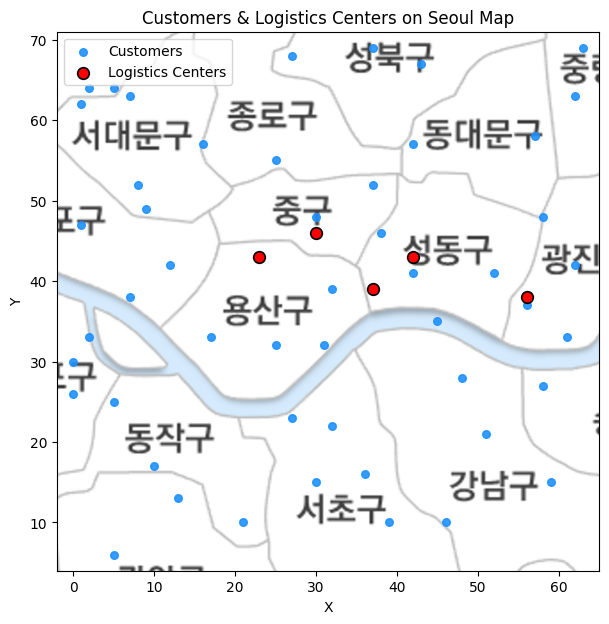

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../seoul_map_5.png")  # 지금 쓰는 서울 지도

# 1) 고객/센터 전체 범위 + 여백 조금
x_min = customers["X"].min() - 2   # 왼쪽 여백
x_max = customers["X"].max() + 2   # 오른쪽 여백
y_min = customers["Y"].min() - 2   # 아래 여백
y_max = customers["Y"].max() + 2   # 위 여백

plt.figure(figsize=(7,7))

# 2) 배경 지도 깔기 (좌표계에 맞춰 늘려서 붙이기)
plt.imshow(
    img,
    extent=[x_min, x_max, y_min, y_max],
    origin="upper"
)

# 고객 점 (파란색)
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.9,
    color="dodgerblue",
    label="Customers"
)

# 물류센터 점 (빨간색)
plt.scatter(
    centers["X"], centers["Y"],
    s=70, alpha=1.0,
    color="red",
    edgecolors="black",   # 테두리 넣으면 더 눈에 띔
    linewidths=1.2,
    label="Logistics Centers"
)


# 5) 축 범위 고정 (배경이랑 완전히 일치)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect("auto")

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(False)
plt.show()


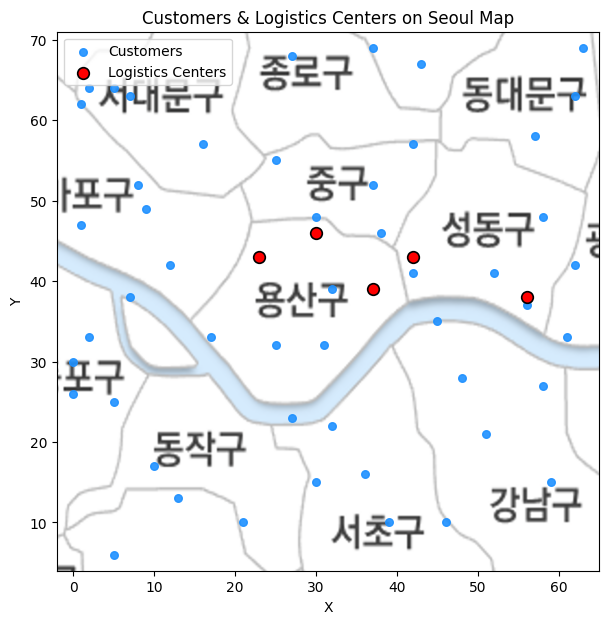

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../seoul_map_6.png")  # 지금 쓰는 서울 지도

# 1) 고객/센터 전체 범위 + 여백 조금
x_min = customers["X"].min() - 2   # 왼쪽 여백
x_max = customers["X"].max() + 2   # 오른쪽 여백
y_min = customers["Y"].min() - 2   # 아래 여백
y_max = customers["Y"].max() + 2   # 위 여백

plt.figure(figsize=(7,7))

# 2) 배경 지도 깔기 (좌표계에 맞춰 늘려서 붙이기)
plt.imshow(
    img,
    extent=[x_min, x_max, y_min, y_max],
    origin="upper"
)

# 고객 점 (파란색)
plt.scatter(
    customers["X"], customers["Y"],
    s=30, alpha=0.9,
    color="dodgerblue",
    label="Customers"
)

# 물류센터 점 (빨간색)
plt.scatter(
    centers["X"], centers["Y"],
    s=70, alpha=1.0,
    color="red",
    edgecolors="black",   # 테두리 넣으면 더 눈에 띔
    linewidths=1.2,
    label="Logistics Centers"
)


# 5) 축 범위 고정 (배경이랑 완전히 일치)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect("auto")

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(False)
plt.show()




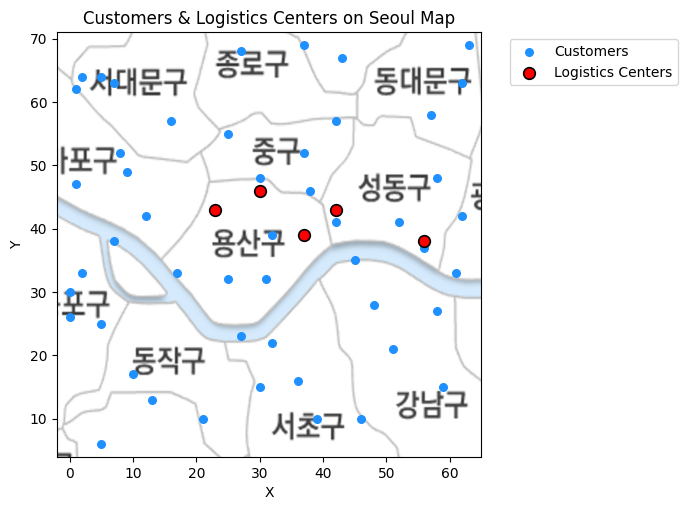

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../seoul_map_6.png")

x_min = customers["X"].min() - 2
x_max = customers["X"].max() + 2
y_min = customers["Y"].min() - 2
y_max = customers["Y"].max() + 2

plt.figure(figsize=(7,7))

plt.imshow(img, extent=[x_min, x_max, y_min, y_max], origin="upper")

plt.scatter(customers["X"], customers["Y"], s=30, color="dodgerblue", label="Customers")
plt.scatter(centers["X"], centers["Y"], s=70, color="red", edgecolors="black", linewidths=1.2, label="Logistics Centers")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")

# ▶ legend를 그래프 바깥으로 빼고 싶으면 이렇게
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0))

plt.grid(False)
plt.tight_layout()
plt.show()


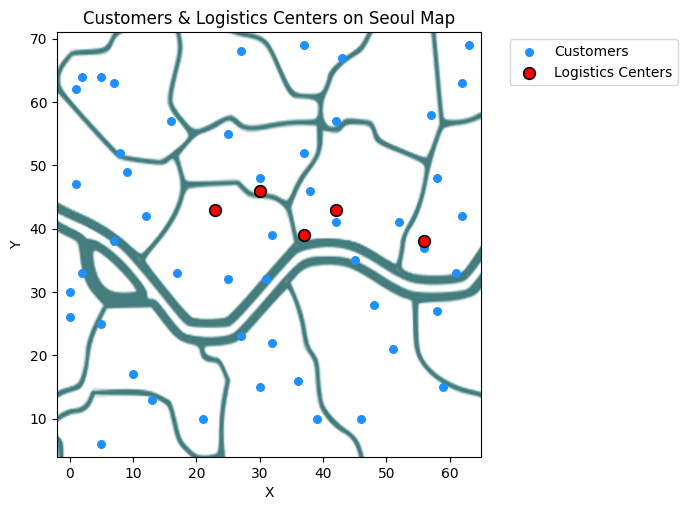

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("../seoul_map_7.png")

x_min = customers["X"].min() - 2
x_max = customers["X"].max() + 2
y_min = customers["Y"].min() - 2
y_max = customers["Y"].max() + 2

plt.figure(figsize=(7,7))

plt.imshow(img, extent=[x_min, x_max, y_min, y_max], origin="upper")

plt.scatter(customers["X"], customers["Y"], s=30, color="dodgerblue", label="Customers")
plt.scatter(centers["X"], centers["Y"], s=70, color="red", edgecolors="black", linewidths=1.2, label="Logistics Centers")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title("Customers & Logistics Centers on Seoul Map")
plt.xlabel("X")
plt.ylabel("Y")

# ▶ legend를 그래프 바깥으로 빼고 싶으면 이렇게
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1.0))

plt.grid(False)
plt.tight_layout()
plt.show()
